**Question 1** : In the folowing definition of a probabilistic model:

$Y \sim \mathcal{N}(\mu, \sigma)$

$\mu \sim \mathcal{N}(0, 2)$

$\sigma \sim \mathcal{halfnormal}(0.75)$

1.1 - Identify the prior and the likelihood.

1.2  - How many parameters will the posterior have?

1.3 - Compare it with the model for the coin-flipping problem.

1.4 - Write Bayes' theorem for the model.


In [ ]:
## Use Latex to write mathematical equations in markdown

  1.1 -
  The likelihood is $Y \sim N(\mu,\sigma)$. $Y$ describes a distribution describing the probablility of observing values with mean $\mu$ and standard deviation $\sigma$. It is a normal distribution.The Prior is $\mu \sim (0,2)$. It is a normal distribution averaged around 0 with a standard deviation of 2. It shows our initial belief about $\mu$ taking into account any observational data.

1.2 -
  The posterior will have two parameters - $\mu$(the mean) and $\sigma$(the standard deviation)

1.3 - In a coin flipping problem, we usually use a Binomial likelihood( $Y \sim Bin(n,\theta$) ) and a Beta Prior( Beta($\alpha,\beta$) ). It led to a Beta distribution as a psterior. meanwhile this model has a binomial distribution as a posterior.

1.4 - $P(μ,σ∣Y)= P(Y∣μ,σ)P(μ)P(σ)/P(Y)$




**Question 2**

Let’s suppose that we have two coins; when we toss the first coin, half of the time it lands on tails
 and half of the time on heads. The other coin is a loaded coin that always lands on heads. If we take
 one of the coins at random and get a head, what is the probability that this coin is the unfair one?

Let us start by defining the events

* $P(U)$ - probability that we pick the unfair coin = $\frac{1}{2}$

* $P(F)$ - probability that we pick the fair coin   = $\frac{1}{2}$  (probabality of picking both coins is equal)

* $P(H)$ - probability that we get heads

* $P(H|U)$ - probability of getting head on the unfair coin = $1$

* $P(H|F)$ - probability of getting heads on the fair coin = $\frac{1}{2}$



We need to find $P(U|H)$ - the probability of th coin chosen being the unfair coin given that we got a heads

First we will compute $P(H)$

$P(H) = P(U).P(H|U) + P(F).P(H|F) = \frac{1}{2}.1 + \frac{1}{2}.\frac{1}{2} = \frac{3}{4}$

By Bayes Theorem we Have,

$P(U|H) = \dfrac{P(H|U).P(U)}{P(H)} = \dfrac{1.\frac{1}{2}}{\frac34} = \frac23$  




**Question 3**


Using PyMC, change the parameters of the prior Beta distribution in `our_first_model` to match those of Week 2. Compare the results.

In [ ]:
#setting up dependencies
!pip install pymc==5.8.0 arviz==0.16.1 bambi==0.13.0 pymc-bart==0.5.2 kulprit==0.0.1 preliz==0.3.6 nutpie==0.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.4/468.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 36.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: pytensor
    Found existing installation: pytensor 2.18.6
    Uninstalling pytensor-2.18.6:
      Successfully uninstalled pytensor-2.18.6
  Attempting uninstall: arviz
    Found existi

In [ ]:
# Import necessary libraries
import arviz as az  # For Bayesian data analysis and visualization
import matplotlib.pyplot as plt  # For plotting
import numpy as np  # For numerical operations
from scipy.special import binom, beta  # For binomial and beta distributions
import preliz as pz # defining priors
from cycler import cycler
import math
import pymc as pm

(<Axes: >,
  message: Optimization terminated successfully
  success: True
   status: 0
      fun: 0.30105907090670136
        x: [ 2.475e+00  3.610e+00]
      nit: 9
      jac: [ 2.580e-03  1.028e-01]
     nfev: 29
     njev: 9)

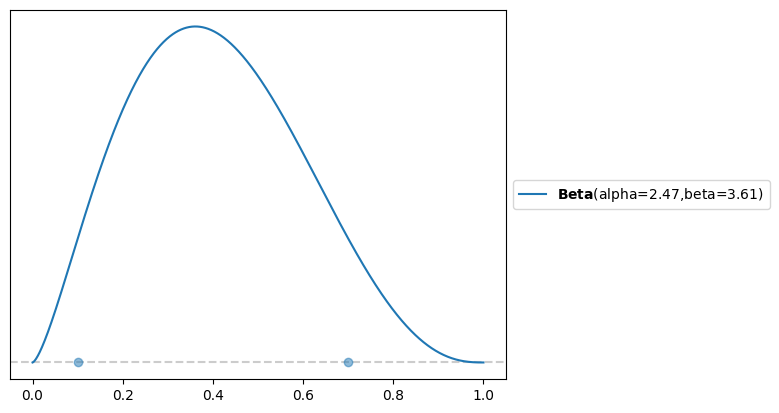

In [ ]:
dist = pz.Beta()                        #the beta prior in week 2
pz.maxent(dist, 0.1, 0.7, 0.9)

array([[<Axes: title={'center': 'θ'}>, <Axes: title={'center': 'θ'}>]],
      dtype=object)

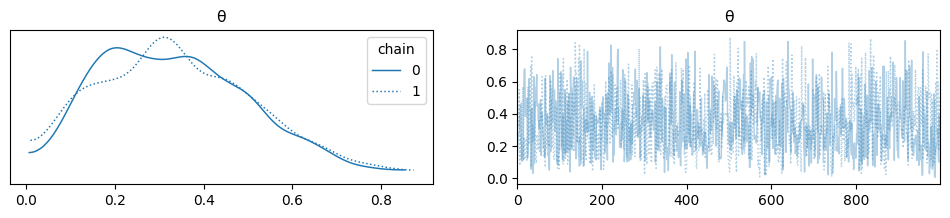

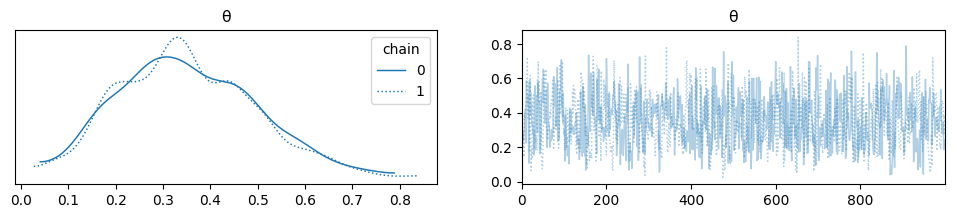

In [ ]:
np.random.seed(123)

# Given parameters
theta_real = 0.35
trials = 4

# Generate data
data = stats.binom.rvs(n=1, p=theta_real, size=trials)

# Define initial model with uniform prior Beta(1, 1)
with pm.Model() as initial_model:
    θ_initial = pm.Beta('θ', alpha=1., beta=1.)
    y_initial = pm.Bernoulli('y', p=θ_initial, observed=data)
    initial_trace = pm.sample(1000, random_seed=4591, return_inferencedata=True)

# Define prior knowledge for the updated model
alpha_prior = 2.47
beta_prior = 3.61

# Define updated model with the new prior Beta(alpha_prior, beta_prior)
with pm.Model() as updated_model:
    θ_updated = pm.Beta('θ', alpha=alpha_prior, beta=beta_prior)
    y_updated = pm.Bernoulli('y', p=θ_updated, observed=data)
    updated_trace = pm.sample(1000, random_seed=4591, return_inferencedata=True)


# Plot the posterior distributions
az.plot_trace(initial_trace, var_names=["θ"], legend=True)
az.plot_trace(updated_trace, var_names=["θ"], legend=True)
